In [344]:
import numpy as np
import random
import scipy.linalg as lin
import scipy.sparse as sparse
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [345]:
#dimensions
n = 2**6
m = 2**5

#random matrix
A1 = np.random.normal(0,1,(m,n))
A1_norm = normalize(A1, axis=0, norm='max')
A_random = A1_norm

#fourier matrix
A2 = lin.dft(n).real
A2_norm = normalize(A2, axis=0, norm='max')
ind = np.random.choice(np.arange(len(A2_norm)),m)
A_fourier = A2_norm[ind,:]

#sparse array
sparse_array = np.zeros([m,n])
s_vals = np.linspace(0,1,m)
for s in s_vals:
    sparse_rand = sparse.rand(1,n,s).toarray()
    sparse_array = np.append(sparse_array,sparse_rand,axis=0)
sparse_array = sparse_array[m+1:]

In [346]:
def norm2(x):
    return np.linalg.norm(x,2)

def normalized_error(x,x_pre):
    return norm2(x-x_pre)/norm2(x)

def hard_thresh(x,s):
    S = np.argsort(abs(x),axis=0)[::-1][:s]
    xT = np.zeros_like(x)
    xT[S] = x[S]
    return xT, S

In [347]:
def L1min(A,x):
    return(error)

def OMP(A,x):  
    b = A.dot(x)
    r = b
    S = []
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        j = np.argmax(abs(A.T.dot(r)))
        S.append(j)
        X = A[:,S]
        x_pre[S] = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(b)
        r = b - A.dot(x_pre)
        count+=1
    error = normalized_error(x,x_pre)
    return(error)

def MP(A,x):
    b = A.dot(x)
    r = b
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        j = np.argmax(abs(A.T.dot(r)))
        t = A[:,j].T.dot(r)
        x_pre[j] = x_pre[j] + t
        r = r - A[:,j].dot(t)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

def IHT(A,x):
    b = A.dot(x)
    r = b
    s = np.count_nonzero(x)
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        j = x_pre + A.T.dot(r)
        x_pre = hard_thresh(j,s)[0]
        r = b - A.dot(x_pre)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

def COSAMP(A,x):
    b = A.dot(x)
    r = b
    s = np.count_nonzero(x)
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        x_new = np.zeros(n)
        j = A.T.dot(r)
        ht = hard_thresh(j,2*s)[1]
        X = A[:,ht]
        x_pre[ht] = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(b)
        ht2 = hard_thresh(x_pre,s)[1]
        x_new[ht2] = x_pre[ht2]
        r = b - A.dot(x_new)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

def BT(A,x):
    b = A.dot(x)
    r = b
    s = np.count_nonzero(x)
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        j = A.T.dot(b)
        ht = hard_thresh(j,s)[1]
        X = A[:,ht]
        x_pre[ht] = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(b)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

def HTP(A,x):
    b = A.dot(x)
    r = b
    s = np.count_nonzero(x)
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        j = x_pre + A.T.dot(r)
        ht = hard_thresh(j,s)[1]
        X = A[:,ht]
        x_pre[ht] = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(b)
        r = b - A.dot(x_pre)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

def SP(A,x):
    b = A.dot(x)
    r = b
    s = np.count_nonzero(x)
    count = 0
    while norm2(r)>thresh and count<m:
        x_pre = np.zeros(n)
        x_new = np.zeros(n)
        j = A.T.dot(r)
        ht = hard_thresh(j,2*s)[1]
        X = A[:,ht]
        x_pre[ht] = np.linalg.pinv(np.dot(X.T,X)).dot(X.T).dot(b)
        ht2 = hard_thresh(x_pre,s)[1]
        X2 = A[:,ht2]
        x_new[ht2] = np.linalg.pinv(np.dot(X2.T,X2)).dot(X2.T).dot(b)
        r = b - A.dot(x_new)
        count += 1
    error = normalized_error(x,x_pre)
    return(error)

In [348]:
thresh = 1e-6
# A = A_random
A = A_fourier
x_all = sparse_array

OMP_solution = []
MP_solution = []
COSAMP_solution = []
IHT_solution = []
BT_solution = []
HTP_solution = []
SP_solution = []

for i in x_all:
    x = i
    OMP_solution.append(OMP(A,x))
    MP_solution.append(MP(A,x))
    IHT_solution.append(IHT(A,x))
    COSAMP_solution.append(COSAMP(A,x))
    BT_solution.append(BT(A,x))
    HTP_solution.append(HTP(A,x))
    SP_solution.append(SP(A,x))
    
OMP_sol = minmax_scale(OMP_solution)
MP_sol = minmax_scale(MP_solution)
COSAMP_sol = minmax_scale(COSAMP_solution)
IHT_sol = minmax_scale(IHT_solution)
BT_sol = minmax_scale(BT_solution)
HTP_sol = minmax_scale(HTP_solution)
SP_sol = minmax_scale(SP_solution)

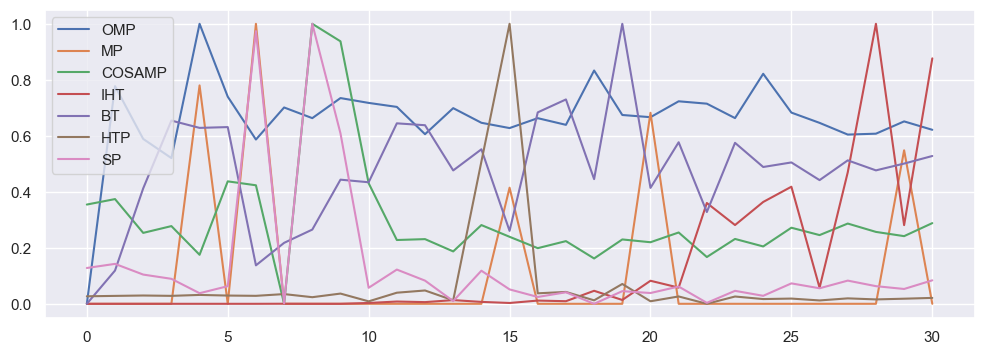

In [349]:
plt.figure(figsize=(12,4))
plt.plot(OMP_sol,label='OMP')
plt.plot(MP_sol,label='MP')
plt.plot(COSAMP_sol,label='COSAMP')
plt.plot(IHT_sol,label='IHT')
plt.plot(BT_sol,label='BT')
plt.plot(HTP_sol,label='HTP')
plt.plot(SP_sol,label='SP')
plt.legend()